<a href="https://colab.research.google.com/github/jsshin8128/KoreaTourGuide/blob/search_data/search_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 관광지 검색량 (경복궁 / 창덕궁 / 창경궁 / 덕수궁 / 종묘 / 서울대공원 / 예술의 전당)
# 경복궁:      gbg
# 창덕궁:      cdg
# 창경궁:      cgg
# 덕수궁:      dsg
# 종묘:        gm
# 서울대공원:  sgp
# 예술의 전당: sac

# df.columns
# date | nv_1d      | nv_7d_avg       | nv_30d_avg       | g_7d_avg      | g_30d_avg      | total_7d_avg         | total_30d_avg
# 날짜 | 네이버 1일 | 네이버 7일 평균 | 네이버 30일 평균 | 구글 7일 평균 | 구글 30일 평균 | 네이버+구글 7일 평균 | 네이버+구글 30일 평균

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


# 네이버 검색량 (단위: 1d)
nv_gbg = pd.read_excel('/content/nv_gbg.xlsx')
nv_cdg = pd.read_excel('/content/nv_cdg.xlsx')
nv_cgg = pd.read_excel('/content/nv_cgg.xlsx')
nv_dsg = pd.read_excel('/content/nv_dsg.xlsx')
nv_gm  = pd.read_excel('/content/nv_gm.xlsx')
nv_sgp = pd.read_excel('/content/nv_sgp.xlsx')
nv_sac = pd.read_excel('/content/nv_sac.xlsx')

# 구글 검색량 (단위: 1w)
g_gbg = pd.read_csv('/content/g_gbg.csv')
g_cdg = pd.read_csv('/content/g_cdg.csv')
g_cgg = pd.read_csv('/content/g_cgg.csv')
g_dsg = pd.read_csv('/content/g_dsg.csv')
g_gm  = pd.read_csv('/content/g_gm.csv')
g_sgp = pd.read_csv('/content/g_sgp.csv')
g_sac = pd.read_csv('/content/g_sac.csv')

In [3]:
from sklearn.preprocessing import StandardScaler

def data_processing(df, g_df):
    df.columns = ['date', 'nv_1d']
    df = df.iloc[6:].reset_index(drop=True)

    df['date'] = pd.to_datetime(df['date'])
    df['nv_7d_avg'] = df['nv_1d'].rolling(window=7).mean()
    df['nv_30d_avg'] = df['nv_1d'].rolling(window=30).mean()

    df = df.loc[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

    df['week'] = df['date'].apply(lambda x: (x - pd.DateOffset(days=(x.weekday() + 1))))
    g_df.index = pd.to_datetime(g_df.index, format='%Y-%m-%d', errors='coerce')
    df['g_7d_avg'] = df['week'].apply(lambda x: int(g_df.loc[x]['Category: All categories']))
    df['g_30d_avg'] = df['week'].apply(
        lambda x: sum(int(g_df.loc[x - pd.DateOffset(weeks=i)]['Category: All categories']) for i in range(4)))

    df['total_7d_avg'] = df['nv_7d_avg'] + df['g_7d_avg']
    df['total_30d_avg'] = df['nv_30d_avg'] + df['g_30d_avg']

    df.drop(columns=['week'], inplace=True)
    df.reset_index(drop=True, inplace=True)

    scaler = StandardScaler()
    df[['nv_1d', 'nv_7d_avg', 'nv_30d_avg', 'g_7d_avg', 'g_30d_avg', 'total_7d_avg', 'total_30d_avg']] = scaler.fit_transform(df[['nv_1d', 'nv_7d_avg', 'nv_30d_avg', 'g_7d_avg', 'g_30d_avg', 'total_7d_avg', 'total_30d_avg']])

    return df

In [4]:
gbg_df = data_processing(nv_gbg, g_gbg)
gbg_df.head()

,date,nv_1d,nv_7d_avg,nv_30d_avg,g_7d_avg,g_30d_avg,total_7d_avg,total_30d_avg
0,2023-01-01,0.163855,-0.260625,-0.502681,-0.131915,-0.312871,-0.206573,-0.364686
1,2023-01-02,-0.472977,-0.301072,-0.500065,-0.334711,-0.312871,-0.348208,-0.364171
2,2023-01-03,-0.626748,-0.356037,-0.513627,-0.334711,-0.312871,-0.375053,-0.366840
3,2023-01-04,-0.411530,-0.364497,-0.522867,-0.334711,-0.312871,-0.379185,-0.368658
4,2023-01-05,-0.420984,-0.384475,-0.528398,-0.334711,-0.312871,-0.388942,-0.369746


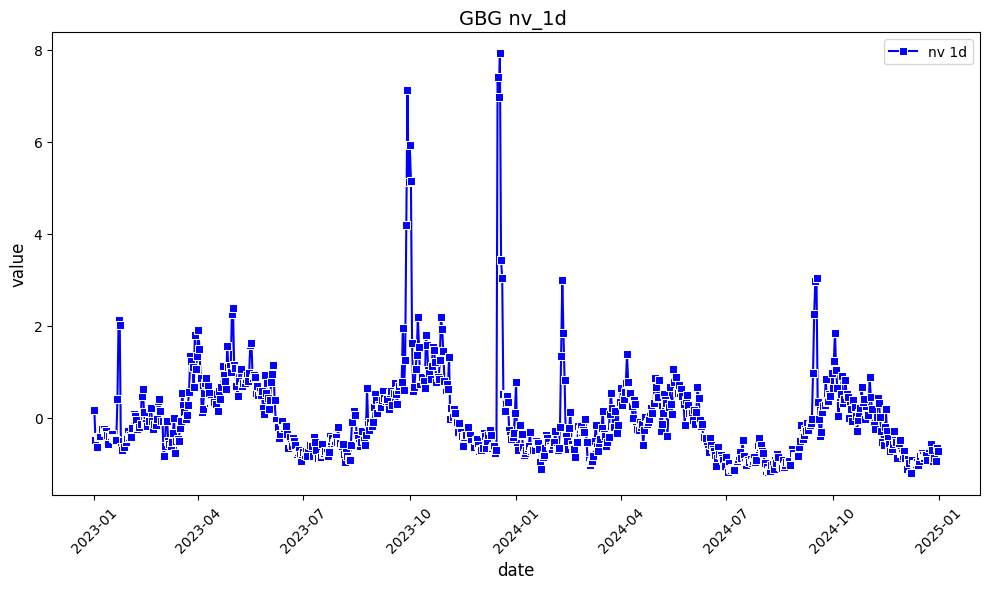

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(x='date', y='nv_1d', data=gbg_df, label='nv 1d', marker='s', color='blue')

plt.title('GBG nv_1d ', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('value', fontsize=12)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

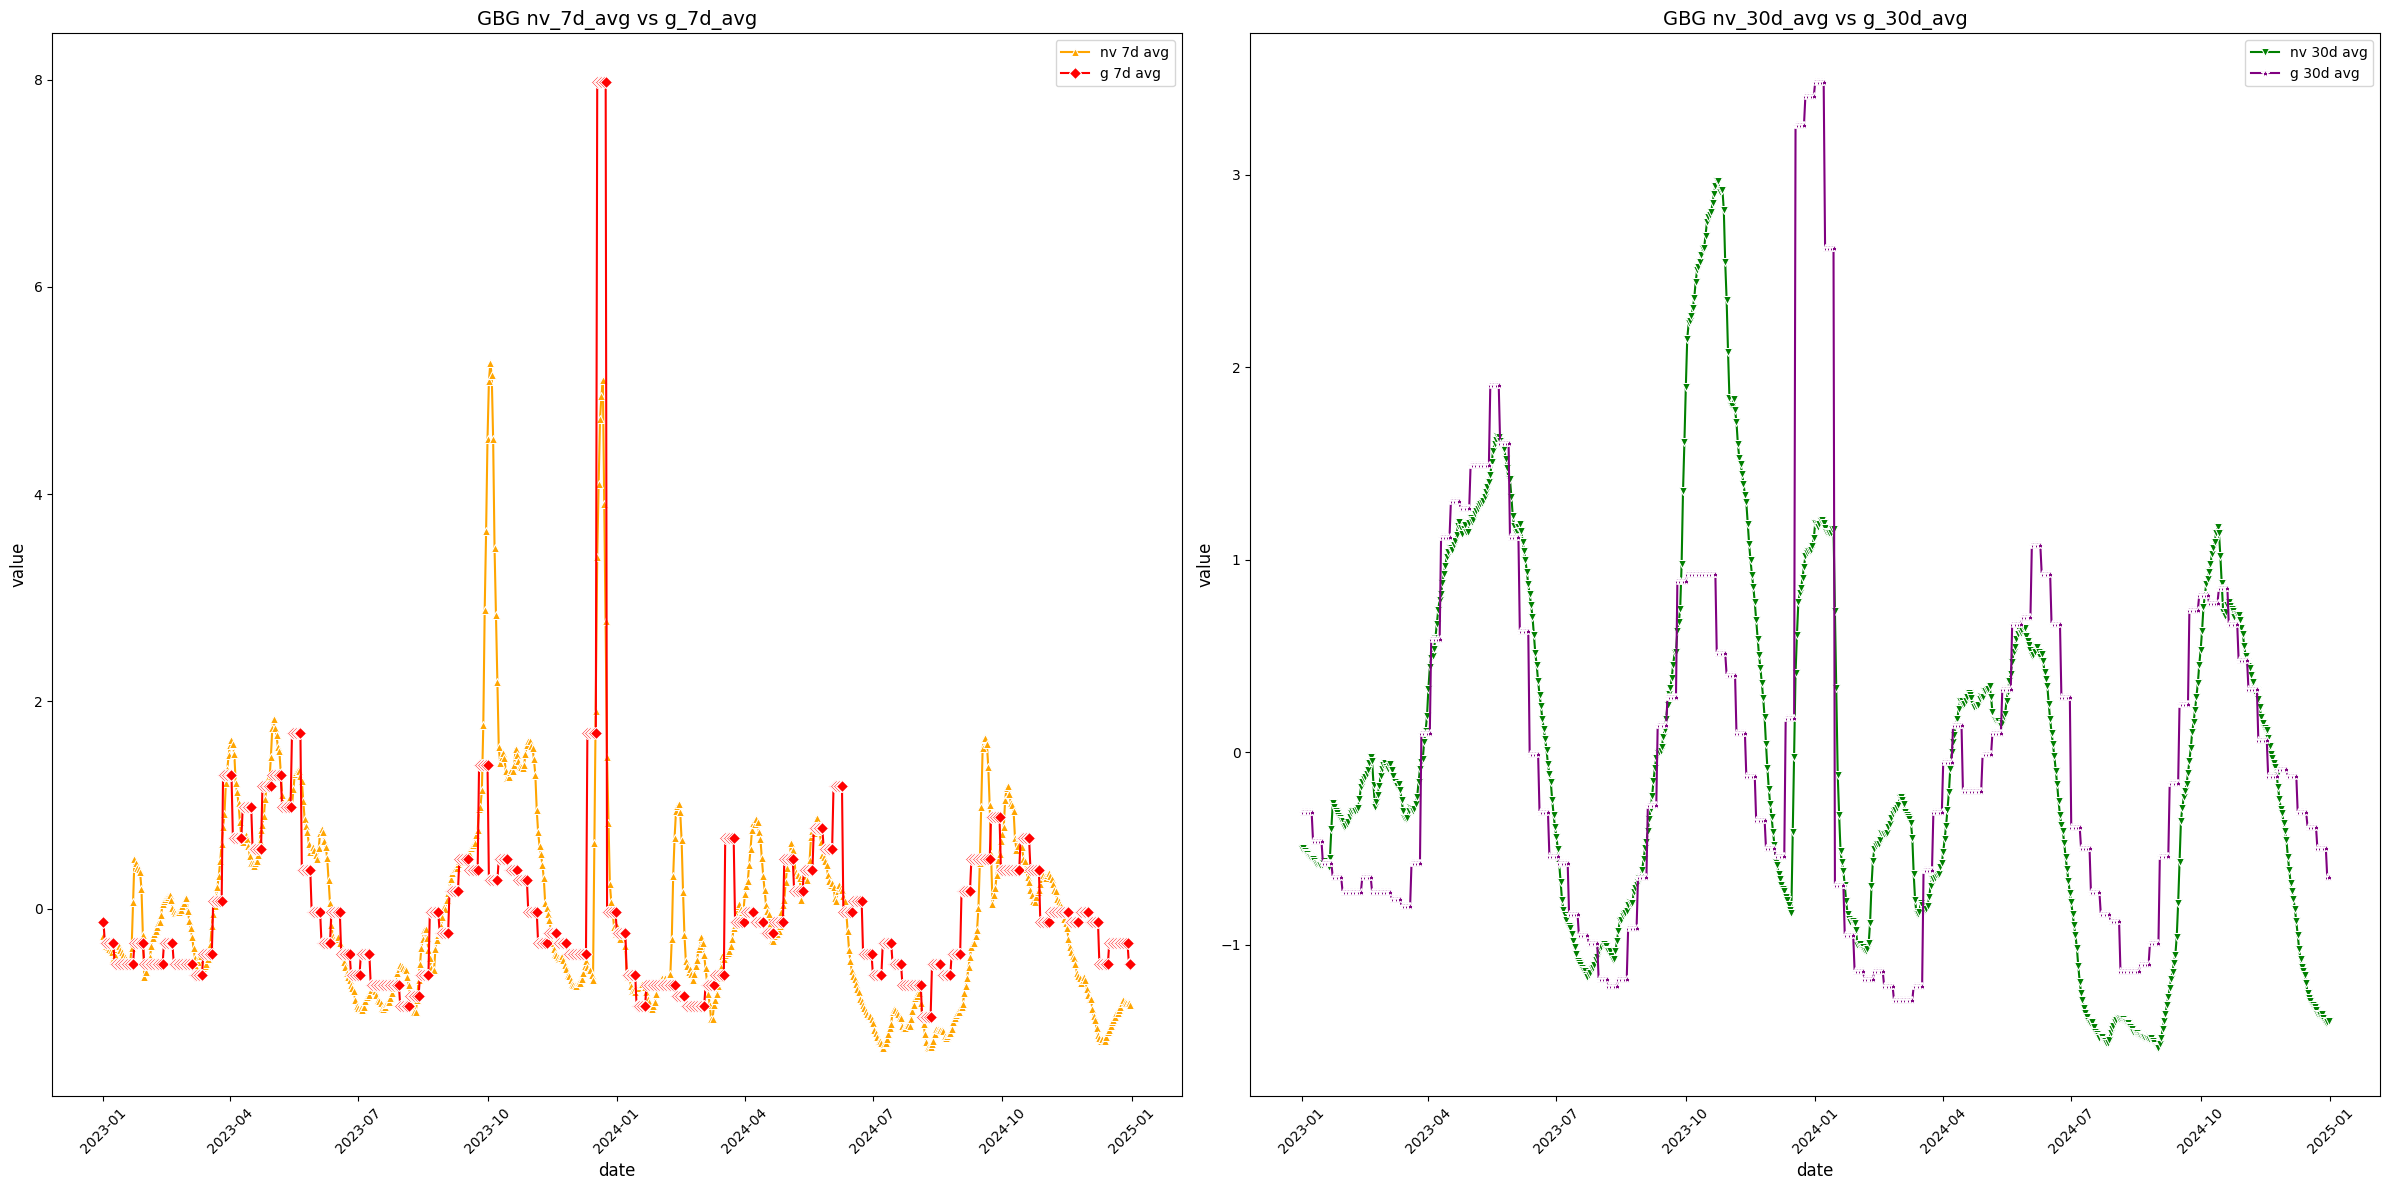

In [6]:
plt.figure(figsize=(24, 12))

plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='nv_7d_avg', data=gbg_df, label='nv 7d avg', marker='^', color='orange')
sns.lineplot(x='date', y='g_7d_avg', data=gbg_df, label='g 7d avg', marker='D', color='red')

plt.title('GBG nv_7d_avg vs g_7d_avg', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='nv_30d_avg', data=gbg_df, label='nv 30d avg', marker='v', color='green')
sns.lineplot(x='date', y='g_30d_avg', data=gbg_df, label='g 30d avg', marker='*', color='purple')

plt.title('GBG nv_30d_avg vs g_30d_avg', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

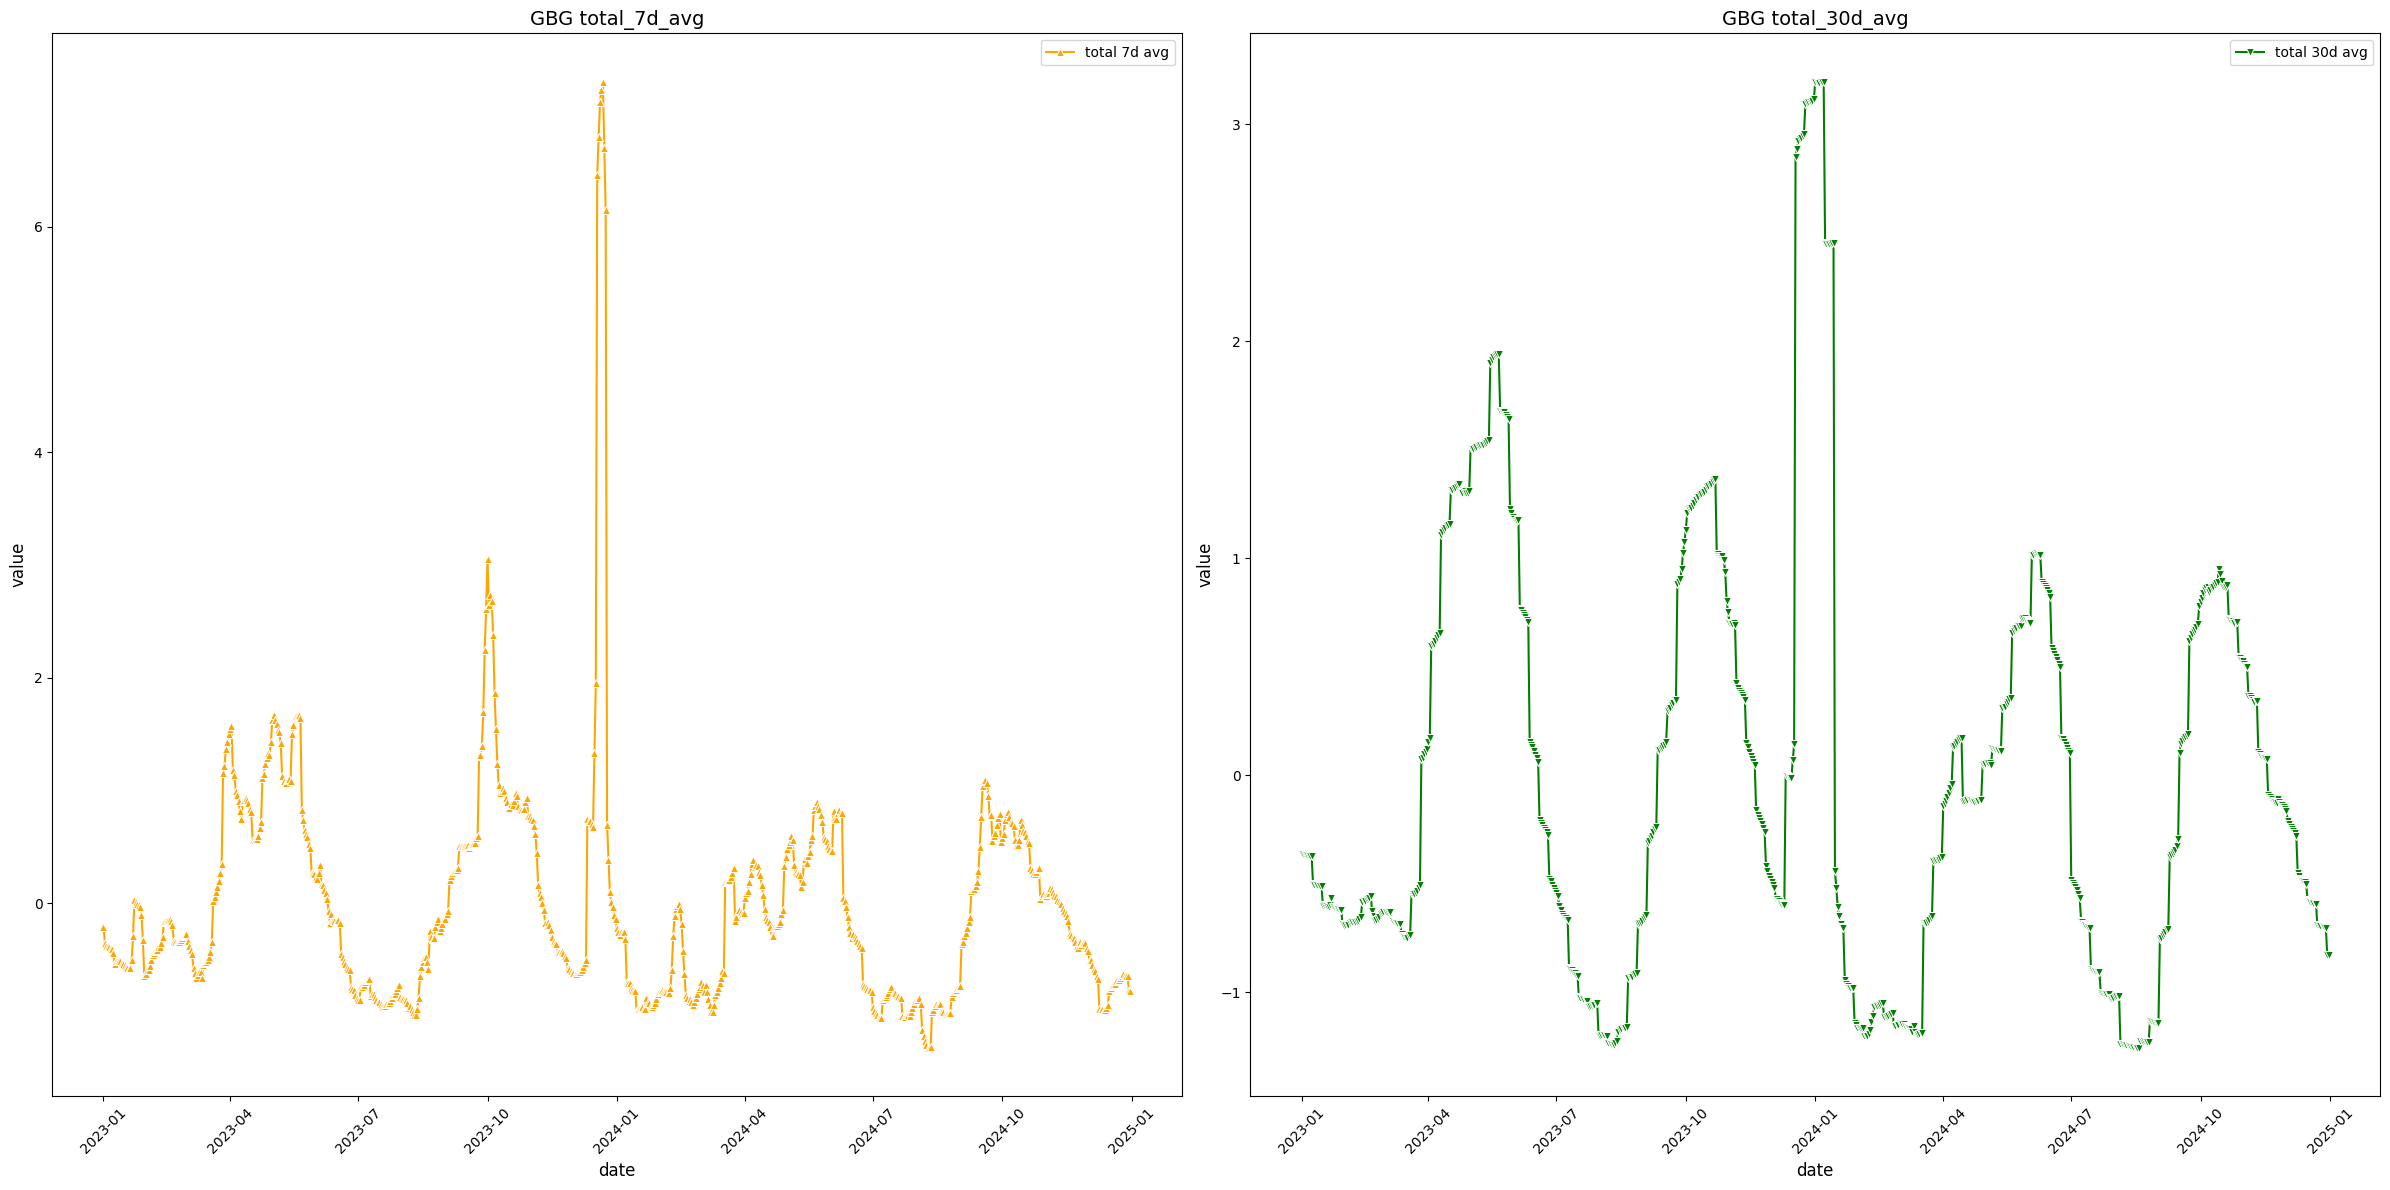

In [7]:
plt.figure(figsize=(24, 12))

plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='total_7d_avg', data=gbg_df, label='total 7d avg', marker='^', color='orange')

plt.title('GBG total_7d_avg', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='total_30d_avg', data=gbg_df, label='total 30d avg', marker='v', color='green')

plt.title('GBG total_30d_avg', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

In [8]:
dataframes = [
    ('nv_gbg', 'g_gbg', '경복궁 데이터.xlsx'),
    ('nv_cdg', 'g_cdg', '창덕궁 데이터.xlsx'),
    ('nv_cgg', 'g_cgg', '창경궁 데이터.xlsx'),
    ('nv_dsg', 'g_dsg', '덕수궁 데이터.xlsx'),
    ('nv_gm', 'g_gm', '종묘 데이터.xlsx'),
    ('nv_sgp', 'g_sgp', '서울대공원 데이터.xlsx'),
    ('nv_sac', 'g_sac', '예술의 전당 데이터.xlsx')
]

for nv, g, filename in dataframes:
    nv_df = globals()[nv]
    g_df = globals()[g]
    data = data_processing(nv_df, g_df)
    data.to_excel(filename, index=False)